In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sciutil import SciUtil

u = SciUtil()

rna_sample_df = pd.read_csv('rna_sample_df.csv')
rna_sample_df = rna_sample_df[rna_sample_df['Disease Type'] == 'Clear Cell Renal Cell Carcinoma']

df = pd.read_csv('../../output_data/RNA.csv')
cols = list(rna_sample_df['Sample'].values)

df = df.dropna(subset=['gene_name'])
mean_rna = np.nanmean(df[cols].values, axis=1)
u.dp(['RNA size: ', df.shape, 'Mean counts:', np.mean(mean_rna)])

u.dp(['RNA size after dropping missing gene names: ', df.shape])

df = df[mean_rna > 10]
u.dp(['RNA size after 10 count filter: ', df.shape])

corr = df[cols].corr()

# Print out the minimum correlation:
mean_cor = np.nanmean(corr, axis=1)
corr['mean_corr'] = mean_cor
corr.sort_values(by=['mean_corr'])

# Plot out the mean correlation values so we can choose a good filter.
plt.hist(mean_cor, bins=20)
plt.title(f'min corr: {np.min(corr)}')
plt.show()

# Filter the shitty patients
corr_sorted = corr.sort_values(by=['mean_corr'])
corr_sorted = corr_sorted[corr_sorted['mean_corr'] < 0.5]

u.dp(['RNA size after correlation filter: ', df.shape])

cols_to_omit = [c for c in corr_sorted.index]

u.dp(['RNA columns to omit: '])

print('\n'.join(cols_to_omit))

cols_to_keep = [c for c in df.columns if c not in cols_to_omit]
df = df[cols_to_keep]


KeyError: "None of [Index(['C3L.00791_Tumor_RNA_ClearCellRenalCellCarcinoma_2c3d90ce.2f4d.42bc.baa4.e01052a73b67',\n       'C3L.00360_Tumor_RNA_ClearCellRenalCellCarcinoma_9d1b8061.5732.4eef.b95e.fe49e7a50d9d',\n       'C3L.00360_Normal_RNA_ClearCellRenalCellCarcinoma_8bc5ea45.df4d.4a4d.8864.78482b147ed8',\n       'C3L.00097_Normal_RNA_ClearCellRenalCellCarcinoma_adf11d76.29a7.4294.9e4f.e20386c9ab1d',\n       'C3L.00097_Tumor_RNA_ClearCellRenalCellCarcinoma_89e44cb8.e015.478d.a13f.83686ea2c107',\n       'C3L.00583_Tumor_RNA_ClearCellRenalCellCarcinoma_3b92a25f.4897.44e8.825f.eaf0a9e4d7c2',\n       'C3L.00583_Tumor_RNA_ClearCellRenalCellCarcinoma_1cb74b70.1e62.48e4.b516.a0783a529c6b',\n       'C3L.00583_Tumor_RNA_ClearCellRenalCellCarcinoma_9f2a0f5e.1549.4d40.b345.02a953a0e5df',\n       'C3L.00583_Normal_RNA_ClearCellRenalCellCarcinoma_72e851d6.01ff.4647.8d77.db52ac5243dc',\n       'C3L.00814_Tumor_RNA_ClearCellRenalCellCarcinoma_7f41524c.570b.4e79.ba51.984a3b603523',\n       ...\n       'C3N.01200_Tumor_RNA_ClearCellRenalCellCarcinoma_c54a604e.9379.46f1.938c.e2d09f8538d8',\n       'C3N.01200_Tumor_RNA_ClearCellRenalCellCarcinoma_ceb4dd9b.6f10.4358.8312.3b126952d3cc',\n       'C3N.01200_Tumor_RNA_ClearCellRenalCellCarcinoma_167073fa.9e38.4f8d.af1f.301ed3a8b5f7',\n       'C3L.00103_Tumor_RNA_ClearCellRenalCellCarcinoma_935091b2.f133.47ec.8fde.133b094f33ba',\n       'C3L.00103_Tumor_RNA_ClearCellRenalCellCarcinoma_296b34a4.f33b.409b.a564.4353643c0c31',\n       'C3L.00103_Tumor_RNA_ClearCellRenalCellCarcinoma_a546437c.4839.4853.93c6.f0f106f1cb93',\n       'C3L.00103_Normal_RNA_ClearCellRenalCellCarcinoma_57dbc5d5.0209.4730.a0ba.35baf389cef4',\n       'C3L.00817_Tumor_RNA_ClearCellRenalCellCarcinoma_9e5ce1d4.2751.4872.bf8f.991b28f8a8d8',\n       'C3L.01557_Tumor_RNA_ClearCellRenalCellCarcinoma_470b07b9.b544.479a.a2c5.39e3176dfc6d',\n       'C3N.00154_Tumor_RNA_ClearCellRenalCellCarcinoma_872bad3a.5f4a.48fb.9310.ffbc7927972a'],\n      dtype='object', length=255)] are in the [columns]"

In [3]:
df

,gene_id,gene_name,C3L.00921_Tumor_RNA_UterineCorpusEndometrialCarcinoma_5187613d.9ba6.4402.84c3.71801ae29d76,C3N.01349_Tumor_RNA_UterineCorpusEndometrialCarcinoma_a95ad9f0.0a69.4afb.9ba1.58c1b6cb34be,C3L.00362_Tumor_RNA_UterineCorpusEndometrialCarcinoma_9dc07176.b01e.44cd.a3bc.63706c35f972,C3L.00161_Tumor_RNA_UterineCorpusEndometrialCarcinoma_2ba9ee9b.45f8.4d06.b9d2.352a5f57b14f,C3L.00905_Tumor_RNA_UterineCorpusEndometrialCarcinoma_1fa7b845.a290.4c55.ae83.fbf44d64729d,C3L.00938_Tumor_RNA_UterineCorpusEndometrialCarcinoma_a93126d3.4c7e.4666.a5e3.bd83b0ea86cc,C3N.01003_Tumor_RNA_UterineCorpusEndometrialCarcinoma_480ad50a.3a46.4a34.af21.4c962ae8b333,C3L.00932_Normal_RNA_UterineCorpusEndometrialCarcinoma_dad9748f.b09b.487e.9821.c1ff9ca5bb5e,...,C3L.00090_Tumor_RNA_UterineCorpusEndometrialCarcinoma_bc3c470e.513e.48e0.be70.322e0cb2b241,C3N.00866_Tumor_RNA_UterineCorpusEndometrialCarcinoma_8760d77d.56dc.4c89.89b0.3f8ee9d38fbd,C3L.00449_Tumor_RNA_UterineCorpusEndometrialCarcinoma_86e31630.23b0.4617.a760.df81831ef427,C3L.00361_Normal_RNA_UterineCorpusEndometrialCarcinoma_f37bf9ad.2fd4.462c.8079.29660393b2d7,C3L.00932_Tumor_RNA_UterineCorpusEndometrialCarcinoma_3d111240.c127.4185.b5d7.2e44bd7c2c5b,C3L.01311_Normal_RNA_UterineCorpusEndometrialCarcinoma_5b3f93a7.98c2.439f.a10c.fccecf7372c9,C3L.01252_Tumor_RNA_UterineCorpusEndometrialCarcinoma_f5478f71.37f1.4603.86a5.8aa41103d5d8,C3L.00771_Tumor_RNA_UterineCorpusEndometrialCarcinoma_8e2497b7.60b7.4a27.8025.f78295c9c521,C3L.00156_Tumor_RNA_UterineCorpusEndometrialCarcinoma_86153bbd.73b7.40c1.a63a.fb4330e79902,C3L.01304_Tumor_RNA_UterineCorpusEndometrialCarcinoma_7e6f35d3.4d48.43fb.8e15.4609d62e925d
4,ENSG00000000003.15,TSPAN6,988,1732,2212,506,3496,1357,406,2043,...,2649,4028,3825,2643,1300,2174,763,923,896,1354
5,ENSG00000000005.6,TNMD,31,37,41,0,41,33,6,31,...,27,47,12,106,33,21,3,22,8,24
6,ENSG00000000419.13,DPM1,328,590,654,250,1070,528,127,1038,...,963,885,1184,1153,393,1100,228,217,258,447
7,ENSG00000000457.14,SCYL3,519,1354,1351,324,1354,1245,137,1282,...,1362,1488,1415,1204,1243,1127,387,439,501,1000
8,ENSG00000000460.17,C1orf112,264,1894,920,68,1042,618,205,446,...,822,886,433,489,684,410,213,224,228,496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60659,ENSG00000288669.1,AC008763.4,1,0,0,1,1,0,2,0,...,0,0,0,0,0,0,0,0,0,0
60660,ENSG00000288670.1,AL592295.6,132,733,402,111,485,383,51,214,...,305,611,163,312,405,220,161,127,98,279
60661,ENSG00000288671.1,AC006486.3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60662,ENSG00000288674.1,AL391628.1,2,5,21,0,2,5,0,12,...,14,12,5,13,7,9,0,16,3,19


In [11]:
rna_sample_df = pd.read_csv('rna_sample_df.csv')
df = pd.read_csv('../../output_data/RNA.csv')

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_2359/3812295623.py:1: DtypeWarning: Columns (21,30,81,167,179,296,337,346,397,483,495,612) have mixed types. Specify dtype option on import or set low_memory=False.
  rna_sample_df = pd.read_csv('rna_sample_df.csv')


In [12]:
for disease in list(set(rna_sample_df['Disease'].values)):
    u.dp(['Saving:', disease])
    samples = list(rna_sample_df[rna_sample_df['Disease'] == disease]['Sample'].values)
    rna_sample_df[rna_sample_df['Sample'].isin(samples)].to_csv(f'../../output_data/{disease}/{disease}_samples_RNA.csv', index=False)
    df[['gene_id', 'gene_name'] + samples].to_csv(f'../../output_data/{disease}/{disease}_RNA.csv', index=False)


--------------------------------------------------------------------------------
                   Saving:	HeadandNeckSquamousCellCarcinoma	                    
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
                    Saving:	PancreaticDuctalAdenocarcinoma	                     
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
                          Saving:	LungAdenocarcinoma	                           
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
                      Saving:	ClearCellRenalCellCarcinoma	                      
--------------------------------------------------------------------------------
----------------------------

In [3]:
u.dp(['RNA shape after dropping columns:', df.shape])

# Drop RNA samples with > 50% missing values
df = df[df.isnull().sum(axis=1) < len(df.values[0])/2]

u.dp(['After dropping rows with 50% nulls:', df.shape])

# Filter sample df to only include those samples
sample_df = rna_sample_df[rna_sample_df['Sample'].isin(cols_to_keep)]

# Fill NAs with 0's
df = df.fillna(0)

--------------------------------------------------------------------------------
                RNA shape after dropping columns:	(31451, 937)	                 
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
               After dropping rows with 50% nulls:	(31451, 937)	                
--------------------------------------------------------------------------------


# Now we want to check each cancer has a separation between tumour and normal and all cancers also have a decent separation

In [4]:
import pandas as pd
from sciviso import *
from sciutil import SciUtil
import seaborn as sns
# Have a look at clustering each of these
from sklearn.decomposition import PCA


cols = list(sample_df['Sample'].values)
vals = df[cols].values.T

# Log2 norm for 
vals = np.log2(vals + 1)
pca = PCA(n_components=2)
pca_values = pca.fit_transform(vals)
var_ratio = pca.fit(vals).explained_variance_ratio_
plt.rcParams['figure.figsize'] = [4, 4]
vis_df = pd.DataFrame()
vis_df['PC_1'] = pca_values[:, 0]
vis_df['PC_2'] = pca_values[:, 1]
vis_df['Stage'] = sample_df['TumorStage_x'].values
vis_df['Disease'] = sample_df['Disease'].values
vis_df['CondID'] = sample_df['CondID'].values


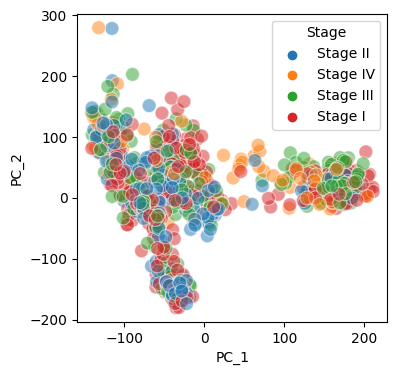

In [5]:

sns.scatterplot(vis_df, x='PC_1', y='PC_2', hue='Stage', s=100, alpha=0.5)
plt.show()

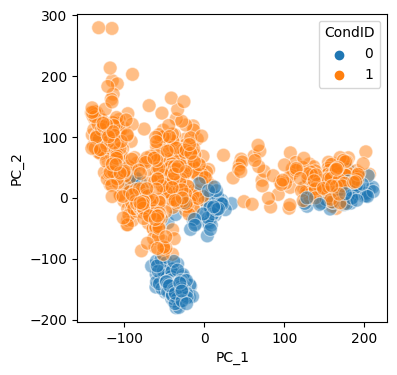

In [6]:

sns.scatterplot(vis_df, x='PC_1', y='PC_2', hue='CondID', s=100, alpha=0.5)
plt.show()

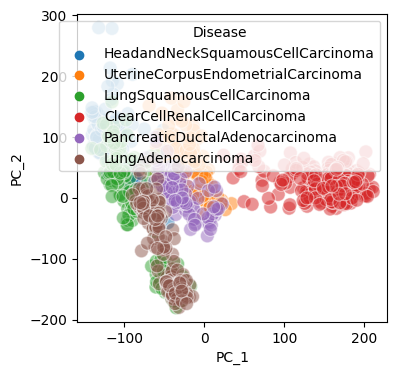

In [7]:

sns.scatterplot(vis_df, x='PC_1', y='PC_2', hue='Disease', s=100, alpha=0.5)
plt.show()

# Subset into ccRCC and then all other cancers

In [8]:
# Drop duplicates based on the case ID and the condition type
u.dp([sample_df.shape])
sample_df_dedup = sample_df.drop_duplicates(subset=['SafeCases', 'CondID'])
u.dp([sample_df_dedup.shape])

--------------------------------------------------------------------------------
                                  (933, 634)	                                   
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
                                  (814, 634)	                                   
--------------------------------------------------------------------------------


In [10]:
for disease in list(set(sample_df_dedup['Disease'].values)):
    u.dp(['Saving:', disease])
    samples = list(sample_df_dedup[sample_df_dedup['Disease'] == disease]['Sample'].values)
    sample_df_dedup[sample_df_dedup['Sample'].isin(samples)].to_csv(f'../../output_data/{disease}/{disease}_filtered_samples_RNA.csv', index=False)
    df[['gene_id', 'gene_name'] + samples].to_csv(f'../../output_data/{disease}/{disease}_filtered_RNA.csv', index=False)


--------------------------------------------------------------------------------
                   Saving:	HeadandNeckSquamousCellCarcinoma	                    
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
                    Saving:	PancreaticDuctalAdenocarcinoma	                     
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
                          Saving:	LungAdenocarcinoma	                           
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
                      Saving:	ClearCellRenalCellCarcinoma	                      
--------------------------------------------------------------------------------
----------------------------

In [48]:
ccrcc_samples = sample_df_dedup[sample_df_dedup['Disease'] == 'ClearCellRenalCellCarcinoma']

In [49]:
sample_df_dedup[sample_df_dedup['Sample'].isin(ccrcc_samples)].to_csv('../../output_data/ccrcc_filtered_samples_RNA.csv', index=False)
sample_df_dedup[~sample_df_dedup['Sample'].isin(ccrcc_samples)].to_csv('../../output_data/pancan_filtered_samples_RNA.csv', index=False)


In [50]:
df[['gene_id', 'gene_name'] + list(sample_df_dedup[~sample_df_dedup['Sample'].isin(ccrcc_samples)]['Sample'].values)].to_csv('../../output_data/pancan_filtered_RNA.csv', index=False)
df[['gene_id', 'gene_name'] + list(sample_df_dedup[sample_df_dedup['Sample'].isin(ccrcc_samples)]['Sample'].values)].to_csv('../../output_data/ccrcc_filtered_RNA.csv', index=False)


In [33]:
df.dropna(subset=['gene_name']).to_csv('../../output_data/filtered_RNA.csv', index=False)

In [42]:
sample_df = sample_df[sample_df['Sample'].isin(list(df.columns))]
sample_df.drop_duplicates(subset='Sample')

,SafeCases,Sample,TumorStage_x,Stage_x,AgeYears_x,CaseFiles_x,CaseFileCounts_x,Case ID_x,Cases Submitter ID_x,Related Entities_x,...,treatment_dose_y,treatment_dose_units_y,treatment_effect_y,treatment_effect_indicator_y,treatment_frequency_y,treatment_intent_type_y,treatment_or_therapy_y,treatment_outcome_y,treatment_type_y,Disease
0,C3N.01946,C3N.01946_Normal_RNA_HeadandNeckSquamousCellCa...,Stage II,Early,-64.0,C3N.01946_Normal_RNA_HeadandNeckSquamousCellCa...,3,df4ed85e-8f98-11ea-b1fd-0aad30af8a83,C3N-01946,NaN,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,HeadandNeckSquamousCellCarcinoma
1,C3N.01946,C3N.01946_Tumor_RNA_HeadandNeckSquamousCellCar...,Stage II,Early,-64.0,C3N.01946_Normal_RNA_HeadandNeckSquamousCellCa...,3,df4ed85e-8f98-11ea-b1fd-0aad30af8a83,C3N-01946,NaN,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,HeadandNeckSquamousCellCarcinoma
2,C3N.01754,C3N.01754_Normal_RNA_HeadandNeckSquamousCellCa...,Stage III,Late,-64.0,C3N.01754_Normal_RNA_HeadandNeckSquamousCellCa...,3,df4ecd30-8f98-11ea-b1fd-0aad30af8a83,C3N-01754,NaN,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,HeadandNeckSquamousCellCarcinoma
3,C3N.01754,C3N.01754_Tumor_RNA_HeadandNeckSquamousCellCar...,Stage III,Late,-64.0,C3N.01754_Normal_RNA_HeadandNeckSquamousCellCa...,3,df4ecd30-8f98-11ea-b1fd-0aad30af8a83,C3N-01754,NaN,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,HeadandNeckSquamousCellCarcinoma
5,C3L.01138,C3L.01138_Normal_RNA_HeadandNeckSquamousCellCa...,Stage IV,Late,-62.0,C3L.01138_Tumor_RNA_HeadandNeckSquamousCellCar...,5,df4e9d3d-8f98-11ea-b1fd-0aad30af8a83,C3L-01138,NaN,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,HeadandNeckSquamousCellCarcinoma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,C3N.02582,C3N.02582_Normal_RNA_LungAdenocarcinoma_affd75...,Stage II,Early,-77.0,C3N.02582_Normal_RNA_LungAdenocarcinoma_affd75...,2,f1ee4435-cf1e-11e9-9a07-0a80fada099c,C3N-02582,NaN,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,LungAdenocarcinoma
1091,C3N.02586,C3N.02586_Normal_RNA_LungAdenocarcinoma_eeea13...,Stage II,Early,-74.0,C3N.02586_Normal_RNA_LungAdenocarcinoma_eeea13...,2,f1ee455a-cf1e-11e9-9a07-0a80fada099c,C3N-02586,NaN,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,LungAdenocarcinoma
1092,C3N.02587,C3N.02587_Normal_RNA_LungAdenocarcinoma_8b59c6...,Stage I,Early,-59.0,C3N.02587_Normal_RNA_LungAdenocarcinoma_8b59c6...,2,f1ee4684-cf1e-11e9-9a07-0a80fada099c,C3N-02587,NaN,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,LungAdenocarcinoma
1093,C3N.02588,C3N.02588_Normal_RNA_LungAdenocarcinoma_b835c7...,Stage II,Early,-69.0,C3N.02588_Normal_RNA_LungAdenocarcinoma_b835c7...,2,f1ee47a8-cf1e-11e9-9a07-0a80fada099c,C3N-02588,NaN,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,LungAdenocarcinoma


In [40]:
len([c for c in df.columns if c not in sample_df['Sample'].values])

4

In [43]:
[c for c in sample_df['Sample'].values if c not in df.columns]

[]

In [41]:
[c for c in df.columns if c not in sample_df['Sample'].values]

['gene_id',
 'gene_name',
 'C3N.00953_Tumor_RNA_ClearCellRenalCellCarcinoma_068976c6.8b97.4abd.b87f.4f453050285d',
 'C3N.00953_Tumor_RNA_ClearCellRenalCellCarcinoma_dcf72985.1920.46b0.b8d8.8e976364edbf']